<a href="https://colab.research.google.com/github/Praveendwivedi/VehicleRoutingProblem/blob/main/clustering-algos/autoclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install smac==0.8.0
!pip install autocluster


In [ ]:
# we will be using sample datasets in sklearn
from sklearn import datasets
from collections import Counter
import pandas as pd

# autocluster functionalities
import autocluster
from autocluster import AutoCluster, get_evaluator

In [ ]:
'''X, y = datasets.make_blobs(n_samples=5000, 
                           n_features=2, 
                           centers=100, 
                           cluster_std=0.4, 
                           shuffle=True, random_state=27)'''

dummy_df = pd.DataFrame(X)
dummy_df.head(5)

,0,1
0,2.000000,3.000000
1,0.387577,0.268546
2,0.176780,0.582963
3,3.277701,0.814082
4,0.387577,0.176780


In [ ]:
# 'TSNE', 'PCA', 'IncrementalPCA', 
        # 'KernelPCA', 'FastICA', 'TruncatedSVD'
cluster = AutoCluster(logger=None)
fit_params = {
    "df": dummy_df, 
    "cluster_alg_ls": [
         'DBSCAN','OPTICS','KMeans', 'Birch', 'SpectralClustering'
    ], 
    "dim_reduction_alg_ls": [
        
    ],
    "optimizer": 'smac',
    "n_evaluations": 400,
    "run_obj": 'quality',
    "seed": 27,
    "cutoff_time": 100,
    "preprocess_dict": {
        "numeric_cols": list(range(2)),
        "categorical_cols": [],
        "ordinal_cols": [],
        "y_col": []
    },
    "evaluator": get_evaluator(evaluator_ls = ['silhouetteScore', 
                                               'daviesBouldinScore', 
                                               'calinskiHarabaszScore'], 
                               weights = [1, 1, 1], 
                               clustering_num = None, 
                               min_proportion = .01, 
                               min_relative_proportion='default'),
    "n_folds": 3,
    "warmstart": False,
    "verbose_level": 1,
}
result_dict = cluster.fit(**fit_params)

238/403 datapoints remaining after outlier removal
Configuration space object:
  Hyperparameters:
    affinity___SpectralClustering, Type: Categorical, Choices: {nearest_neighbors, poly, sigmoid, laplacian, rbf}, Default: rbf
    assign_labels___SpectralClustering, Type: Categorical, Choices: {kmeans, discretize}, Default: kmeans
    branching_factor___Birch, Type: UniformInteger, Range: [10, 1000], Default: 50
    cluster_method___OPTICS, Type: Categorical, Choices: {xi, dbscan}, Default: xi
    clustering_choice, Type: Categorical, Choices: {DBSCAN, OPTICS, KMeans, Birch, SpectralClustering}, Default: DBSCAN
    eigen_solver___SpectralClustering, Type: Categorical, Choices: {arpack}, Default: arpack
    eps___DBSCAN, Type: UniformFloat, Range: [0.01, 5.0], Default: 0.01
    metric___OPTICS, Type: Categorical, Choices: {minkowski, euclidean, manhattan, l1, l2, cosine}, Default: minkowski
    min_samples___DBSCAN, Type: UniformInteger, Range: [5, 100], Default: 5
    min_samples___OPTI

Fitting configuration: 
{'clustering_choice': 'Birch', 'branching_factor___Birch': 139, 'n_clusters___Birch': 54}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (54). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (54). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (54). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (54). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: Con

Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 2.7557765108789174, 'min_samples___DBSCAN': 58}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 2.336972639976693, 'min_samples___DBSCAN': 85}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 27}
Score obtained by this configuration: 0.32559428192611795
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 3.1281994787237264, 'min_samples___DBSCAN': 46}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.9830027430011568, 'min_samples___DBSCAN': 94}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 3.650696479783209, 'min_samples___DBSCAN': 11}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'OPTICS', 'cluster_method___OPTICS': 'xi', 'metric___OPTICS': 'l2', 'min_samples___OPTICS': 496}


Process pynisher function call:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pynisher/limit_function_call.py", line 133, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 259, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 227, in fit_models
    clustering_model.fit(compressed_data)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 438, in compute_optics_graph
    _va

Fitting configuration: 
{'clustering_choice': 'OPTICS', 'cluster_method___OPTICS': 'xi', 'metric___OPTICS': 'l1', 'min_samples___OPTICS': 197}


Process pynisher function call:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pynisher/limit_function_call.py", line 133, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 259, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 227, in fit_models
    clustering_model.fit(compressed_data)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 438, in compute_optics_graph
    _va

Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 2}
Score obtained by this configuration: 0.3102254871905719
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'assign_labels___SpectralClustering': 'discretize', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 48}
Score obtained by this configuration: 0.3462589811923107
Fitting configuration: 
{'clustering_choice': 'OPTICS', 'cluster_method___OPTICS': 'xi', 'metric___OPTICS': 'euclidean', 'min_samples___OPTICS': 213}


Process pynisher function call:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pynisher/limit_function_call.py", line 133, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 259, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 227, in fit_models
    clustering_model.fit(compressed_data)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 438, in compute_optics_graph
    _va

Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 46}
Score obtained by this configuration: 0.2250822768714781
Fitting configuration: 
{'clustering_choice': 'OPTICS', 'cluster_method___OPTICS': 'xi', 'metric___OPTICS': 'l1', 'min_samples___OPTICS': 537}


Process pynisher function call:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pynisher/limit_function_call.py", line 133, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 259, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 227, in fit_models
    clustering_model.fit(compressed_data)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 438, in compute_optics_graph
    _va

Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'nearest_neighbors', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 21}


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Score obtained by this configuration: 0.3919916271400297
Fitting configuration: 
{'clustering_choice': 'Birch', 'branching_factor___Birch': 509, 'n_clusters___Birch': 45}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (45). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (45). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (45). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (45). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: Con

Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 45}
Score obtained by this configuration: 0.2266691132125849
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'nearest_neighbors', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 27}


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Score obtained by this configuration: 0.4613506620725571
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 33}
Score obtained by this configuration: 0.2431209600457791
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 57}
Score obtained by this configuration: 0.3146834711613808
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 56}
Score obtained by this configuration: 0.1997416811746251
Fitting configuration: 
{'clustering_choice': 'OPTICS', 'cluster_method___OPTICS': 'dbscan', 'metric___OPTICS': 'cosine', 'min_samples___OPTICS': 218}


Process pynisher function call:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pynisher/limit_function_call.py", line 133, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 259, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 227, in fit_models
    clustering_model.fit(compressed_data)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 438, in compute_optics_graph
    _va

Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'sigmoid', 'assign_labels___SpectralClustering': 'discretize', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 6}
Score obtained by this configuration: 0.49363482529346375
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 3.1507128241980533, 'min_samples___DBSCAN': 5}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.5719581631505459, 'min_samples___DBSCAN': 83}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 3.478160876098315, 'min_samples___DBSCAN': 20}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.12951633639942556, 'min_samples___DBSCAN': 82}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'assign_labels___SpectralClustering': 'discretize', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 8}
Score obtained by this configuration: 0.29460607264914435
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 61}
Score obtained by this configuration: 0.19622924166281017
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 18}
Score obtained by this configuration: 0.34099862198454617
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 2.0464600942741553, 'min_samples___DBSCAN': 7}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 28}
Score obtained by this configuration: 0.26309888724009073
Fitting configuration: 
{'clustering_choice': 'OPTICS', 'cluster_method___OPTICS': 'dbscan', 'metric___OPTICS': 'manhattan', 'min_samples___OPTICS': 374}


Process pynisher function call:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pynisher/limit_function_call.py", line 133, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 259, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 227, in fit_models
    clustering_model.fit(compressed_data)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 438, in compute_optics_graph
    _va

Fitting configuration: 
{'clustering_choice': 'Birch', 'branching_factor___Birch': 74, 'n_clusters___Birch': 13}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (13). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (13). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (13). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (13). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: Con

Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'OPTICS', 'cluster_method___OPTICS': 'xi', 'metric___OPTICS': 'euclidean', 'min_samples___OPTICS': 109}


Process pynisher function call:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pynisher/limit_function_call.py", line 133, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 272, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 438, in compute_optics_graph
    _validate_size(min_samples, n_samples, 'min_samples')


Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 25}
Score obtained by this configuration: 0.279026829121608
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.9804213203915861, 'min_samples___DBSCAN': 12}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 26}
Score obtained by this configuration: 0.2698528142738334
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 49}
Score obtained by this configuration: 0.21782101121298839
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 54}
Score obtained by this configuration: 0.20598154709737174
Fitting configuration: 
{'clustering_choice': 'OPTICS', 'cluster_method___OPTICS': 'xi', 'metric___OPTICS': 'minkowski', 'min_samples___OPTICS': 954}


Process pynisher function call:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pynisher/limit_function_call.py", line 133, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 259, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 227, in fit_models
    clustering_model.fit(compressed_data)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 438, in compute_optics_graph
    _va

Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 21}
Score obtained by this configuration: 0.27553533800542956
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 3.407453594134401, 'min_samples___DBSCAN': 7}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 1}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 4.106232222418921, 'min_samples___DBSCAN': 95}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 8}
Score obtained by this configuration: 0.2985759727981599
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 15}
Score obtained by this configuration: 0.3210610520039578
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 40}
Score obtained by this configuration: 0.23586967321960153
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'nearest_neighbors', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 70}


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Score obtained by this configuration: 0.4076393111393377
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 7}
Score obtained by this configuration: 0.2893673252612296
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 4}
Score obtained by this configuration: 0.22238346523532493
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 2.80132584306987, 'min_samples___DBSCAN': 60}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'branching_factor___Birch': 155, 'n_clusters___Birch': 51}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (51). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (51). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (51). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (51). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: Con

Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'branching_factor___Birch': 585, 'n_clusters___Birch': 53}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (53). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (53). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (53). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (53). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: Con

Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 6}
Score obtained by this configuration: 0.24597965531328314
Fitting configuration: 
{'clustering_choice': 'OPTICS', 'cluster_method___OPTICS': 'xi', 'metric___OPTICS': 'l1', 'min_samples___OPTICS': 450}


Process pynisher function call:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pynisher/limit_function_call.py", line 133, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 259, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 227, in fit_models
    clustering_model.fit(compressed_data)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 438, in compute_optics_graph
    _va

Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 3}
Score obtained by this configuration: 0.25286638274962703
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 68}
Score obtained by this configuration: 0.1795088432536043
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.2478189541652074, 'min_samples___DBSCAN': 100}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.1595777024825646, 'min_samples___DBSCAN': 61}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 2.5541073902069162, 'min_samples___DBSCAN': 44}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 3.3820443742330513, 'min_samples___DBSCAN': 78}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'OPTICS', 'cluster_method___OPTICS': 'dbscan', 'metric___OPTICS': 'minkowski', 'min_samples___OPTICS': 559}


Process pynisher function call:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pynisher/limit_function_call.py", line 133, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 259, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 227, in fit_models
    clustering_model.fit(compressed_data)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 438, in compute_optics_graph
    _va

Fitting configuration: 
{'clustering_choice': 'Birch', 'branching_factor___Birch': 47, 'n_clusters___Birch': 73}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (73). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (73). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (73). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (73). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: Con

Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'OPTICS', 'cluster_method___OPTICS': 'dbscan', 'metric___OPTICS': 'manhattan', 'min_samples___OPTICS': 475}


Process pynisher function call:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pynisher/limit_function_call.py", line 133, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 259, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 227, in fit_models
    clustering_model.fit(compressed_data)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 438, in compute_optics_graph
    _va

Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 12}
Score obtained by this configuration: 0.2990779816896325
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 4.838669492534114, 'min_samples___DBSCAN': 48}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'assign_labels___SpectralClustering': 'discretize', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 46}
Score obtained by this configuration: 0.3004298930478087
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.4554584655064602, 'min_samples___DBSCAN': 98}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'assign_labels___SpectralClustering': 'discretize', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 36}
Score obtained by this configuration: 0.31985176598049825
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 17}
Score obtained by this configuration: 0.3384064868025632
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 37}
Score obtained by this configuration: 0.3213070417853305
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 42}
Score obt

Fitting configuration: 
{'clustering_choice': 'Birch', 'branching_factor___Birch': 677, 'n_clusters___Birch': 64}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (64). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (64). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (64). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (64). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: Con

Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 71}
Score obtained by this configuration: 0.17211213407499262
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'nearest_neighbors', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 36}


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Score obtained by this configuration: 0.5147650456261945
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'poly', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 68}
Score obtained by this configuration: 0.2599041375552545
Optimization is complete.
Took 56.88 seconds.
The optimal configuration is 
Configuration:
  clustering_choice, Value: 'KMeans'
  n_clusters___KMeans, Value: 71



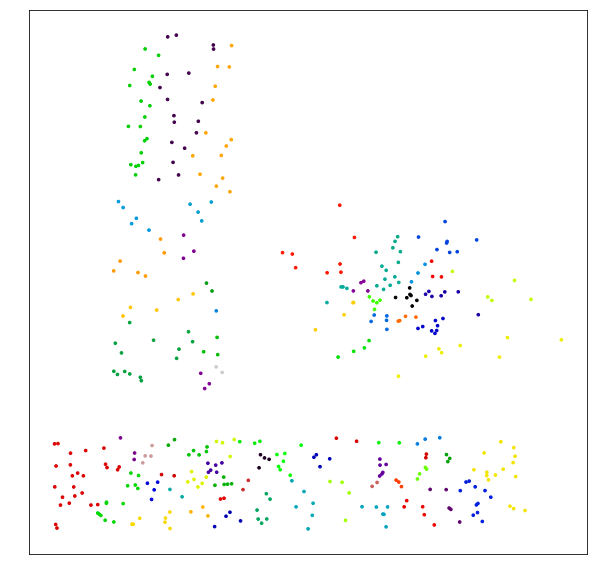

In [ ]:
predictions = cluster.predict(dummy_df, save_plot=False)